In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

from tabulate import tabulate
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings(action='ignore')

import zipfile 
import kaggle

pd.options.display.float_format = '{:.2f}'.format

In [2]:
!kaggle datasets download -d arnabchaki/fitness-trackers-products-ecommerce

fitness-trackers-products-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
zipfile_name =  'fitness-trackers-products-ecommerce.zip'

with zipfile.ZipFile(zipfile_name, "r") as file:
    file.extractall()

In [4]:
data = pd.read_csv("smartwatches.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           450 non-null    int64  
 1   Brand                450 non-null    object 
 2   Current Price        440 non-null    float64
 3   Original Price       377 non-null    float64
 4   Discount Percentage  377 non-null    float64
 5   Rating               444 non-null    float64
 6   Number OF Ratings    391 non-null    float64
 7   Model Name           415 non-null    object 
 8   Dial Shape           327 non-null    object 
 9   Strap Color          327 non-null    object 
 10  Strap Material       381 non-null    object 
 11  Touchscreen          413 non-null    object 
 12  Battery Life (Days)  418 non-null    float64
 13  Bluetooth            444 non-null    object 
 14  Display Size         420 non-null    object 
 15  Weight               264 non-null    obj

In [6]:
data.describe()

,Unnamed: 0,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
count,450.00,440.00,377.00,377.00,444.00,391.00,418.00
mean,224.50,12747.55,14598.20,48.24,4.03,11594.73,14.08
std,130.05,17760.67,15450.03,24.11,0.55,40423.89,7.72
min,0.00,1199.00,1669.00,-79.69,1.00,1.00,0.75
25%,112.25,2180.75,5999.00,33.34,3.90,68.50,8.00
50%,224.50,3999.00,7999.00,54.55,4.10,996.00,17.50
75%,336.75,17121.75,17999.00,66.68,4.30,6022.00,22.00
max,449.00,139990.00,96390.00,91.00,5.00,619130.00,22.00


In [7]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
data.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.00,89900.00,7.69,4.00,65.00,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.00,Yes,NaN,35 - 50 g
1,fire-boltt,3799.00,16999.00,77.65,4.30,20788.00,BSW046,NaN,NaN,Silicon,Yes,3.50,Yes,1.8 inches,50 - 75 g
2,boat,1999.00,7990.00,74.98,3.80,21724.00,Wave Call,NaN,NaN,Silicon,Yes,8.00,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.00,19999.00,91.00,4.30,13244.00,BSW053,NaN,NaN,Silicon,Yes,3.50,Yes,1.8 inches,75g +
4,noise,1599.00,4999.00,68.01,4.10,13901.00,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.00,Yes,1.7 inches,35 - 50 g


In [9]:
import statistics

In [10]:
data.loc[:,"Display Size"]=data.loc[:,"Display Size"].str.strip('inches')

In [11]:
data.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.00,89900.00,7.69,4.00,65.00,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.00,Yes,NaN,35 - 50 g
1,fire-boltt,3799.00,16999.00,77.65,4.30,20788.00,BSW046,NaN,NaN,Silicon,Yes,3.50,Yes,1.8,50 - 75 g
2,boat,1999.00,7990.00,74.98,3.80,21724.00,Wave Call,NaN,NaN,Silicon,Yes,8.00,Yes,1.7,35 - 50 g
3,fire-boltt,1799.00,19999.00,91.00,4.30,13244.00,BSW053,NaN,NaN,Silicon,Yes,3.50,Yes,1.8,75g +
4,noise,1599.00,4999.00,68.01,4.10,13901.00,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.00,Yes,1.7,35 - 50 g


In [12]:
data['Display Size'] = data['Display Size'].astype('float')

In [13]:
o_mode=data.groupby('Brand')[data.select_dtypes(include='object').columns.drop(['Brand'])
].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

In [14]:
n_median=data.groupby('Brand')[data.select_dtypes(include=np.number).columns].median()

In [15]:
# for col in data.columns.drop('Brand'):
    
#     if data[col].dtype == 'o':
#         data.loc[:,col] = data.loc[:,col].fillna(data.loc[:,'Brand'].map(o_mode[col]))
#         print('object')
#     elif data[col].dtype == np.number:
#         data.loc[:,col] = data.loc[:,col].fillna(data.loc[:,'Brand'].map(n_median[col]))
#         print('number')

In [16]:
obj = 0
no = 0
for col in data.columns.drop('Brand'):
    if data[col].dtype == 'O':
        data[col] = data[col].fillna(data['Brand'].map(o_mode[col]))
        obj+=1
    elif np.issubdtype(data[col].dtype, np.number):
        data[col] = data[col].fillna(data['Brand'].map(n_median[col]))
        no+=1
print(f"Total number of object columns affected: {obj} \n"
    f"Total number of numeric columns affected: {no}")

Total number of object columns affected: 7 
Total number of numeric columns affected: 7


In [17]:
data.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.00,89900.00,7.69,4.00,65.00,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,Rectangle,Black,Other,Yes,8.00,Yes,1.70,35 - 50 g
1,fire-boltt,3799.00,16999.00,77.65,4.30,20788.00,BSW046,Square,Black,Silicon,Yes,3.50,Yes,1.80,50 - 75 g
2,boat,1999.00,7990.00,74.98,3.80,21724.00,Wave Call,Rectangle,Black,Silicon,Yes,8.00,Yes,1.70,35 - 50 g
3,fire-boltt,1799.00,19999.00,91.00,4.30,13244.00,BSW053,Square,Black,Silicon,Yes,3.50,Yes,1.80,75g +
4,noise,1599.00,4999.00,68.01,4.10,13901.00,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,Rectangle,Black,Other,Yes,8.00,Yes,1.70,35 - 50 g


In [18]:
def check(data):
    dict={}
    for col in data.columns:
        dtype = data[col].dtypes
        valid_instances = data[col].count()
        unique = data[col].nunique()
        null_count = data[col].isnull().sum()
        duplicates = data[col].duplicated().sum()
        dict[col] = dtype,valid_instances,unique,null_count,duplicates
        data_check = pd.DataFrame(dict, index=["dtype","valid_instances","unique","sum_null","duplicates"]).T
    return data_check

check(data)

,dtype,valid_instances,unique,sum_null,duplicates
Brand,object,450,18,0,432
Current Price,float64,450,167,0,283
Original Price,float64,450,106,0,344
Discount Percentage,float64,450,276,0,174
Rating,float64,450,27,0,423
Number OF Ratings,float64,450,257,0,193
Model Name,object,449,389,1,60
Dial Shape,object,445,6,5,443
Strap Color,object,445,30,5,419
Strap Material,object,445,15,5,434


In [19]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)

In [20]:
def check_unique(data):
    nunique=data.apply(lambda col: col.nunique())
    unique_values = data.apply(lambda col: col.unique())
    data_check = pd.DataFrame({'uni_count': nunique, 'unique_values': unique_values})
    return data_check

check_unique(data)

,uni_count,unique_values
Brand,18,"[noise, fire-boltt, boat, honor, crossbeats, s..."
Current Price,167,"[82990.0, 3799.0, 1999.0, 1799.0, 1599.0, 1499..."
Original Price,106,"[89900.0, 16999.0, 7990.0, 19999.0, 4999.0, 39..."
Discount Percentage,276,"[7.686318131, 77.65162657, 74.98122653, 91.004..."
Rating,27,"[4.0, 4.3, 3.8, 4.1, 3.5, 4.2, 3.9, 3.6, 3.7, ..."
Number OF Ratings,257,"[65.0, 20788.0, 21724.0, 13244.0, 13901.0, 327..."
Model Name,389,"[Wrb-sw-colorfitpro4alpha-std-rgld_pnk, BSW046..."
Dial Shape,6,"[Rectangle, Square, Circle, nan, Curved, Conte..."
Strap Color,30,"[Black, nan, Midnight, Starlight Sport, Pink, ..."
Strap Material,15,"[Other, Silicon, Polycarbonate, Metal, Stainle..."


In [21]:
outliers = {}

for col in data.select_dtypes(include=np.number).columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr

    col_outliers = data[(data[col]>upper_bound) | (data[col]<lower_bound)]
    outliers[col] = col_outliers

print("Summary Stats for smartwatches:")
print(tabulate(data.describe(),headers='keys',tablefmt='pretty'))

for col, outlier_data in outliers.items():
    if len(outlier_data) == 0:
        continue
    else:
        print(f"Outliers in {col}", len(outlier_data))
        print(tabulate(outlier_data.head(),headers='keys',tablefmt='pretty'))



Summary Stats for smartwatches:
+-------+--------------------+--------------------+---------------------+--------------------+--------------------+---------------------+--------------------+
|       |   Current Price    |   Original Price   | Discount Percentage |       Rating       | Number OF Ratings  | Battery Life (Days) |    Display Size    |
+-------+--------------------+--------------------+---------------------+--------------------+--------------------+---------------------+--------------------+
| count |       440.0        |       440.0        |        440.0        |       440.0        |       440.0        |        439.0        |       440.0        |
| mean  | 13104.452272727272 | 16906.979545454546 |  43.08094525723182  | 4.031818181818182  | 10133.967045454545 | 14.097038724373578  | 2.1470454545454545 |
|  std  | 17861.66489668709  | 15609.239458008176 | 25.131434293899545  | 0.5535854255296769 | 38193.19469981024  |  7.663339483067651  | 4.283388520655802  |
|  min  |     

In [22]:
pd.reset_option('display.max_rows')

outliers.get('Display Size').sort_values('Display Size', ascending=False)

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
296,fossil,18995.00,21995.00,39.41,4.00,102.00,Wander RG,Circle,Black,Silicon,Yes,22.00,Yes,45.00,75g +
50,garmin,39490.00,44990.00,15.19,3.70,6.00,7.54E+11,Circle,Black,Silicon,Yes,22.00,Yes,35.90,35 - 50 g
52,garmin,39490.00,44990.00,15.19,5.00,1.00,7.54E+11,Circle,Black,Silicon,Yes,22.00,Yes,35.90,35 - 50 g
247,garmin,39490.00,41990.00,5.95,4.80,6.00,"Venu 2, GPS Smartwatch, AMOLED Display, Upto 1...",Circle,Blue,Silicon,Yes,17.50,Yes,33.00,20 - 35 g
54,garmin,39490.00,44990.00,15.19,3.80,38.00,7.54E+11,Circle,Black,Stainless Steel,Yes,8.00,Yes,30.00,75g +
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,pebble,2499.00,3299.00,24.25,3.80,1176.00,"Prism 1.7""Display With Fitness & Outdoor Activ...",Square,Blue,Silicon,Yes,8.00,Yes,0.10,20 - 35 g
374,pebble,4990.00,6999.00,28.70,4.10,1964.00,COSMOS,Square,Rose Gold,Silicon,Yes,3.50,Yes,0.10,20 - 35 g
375,pebble,2999.00,5499.00,45.46,3.80,1176.00,"Pace Pro Smartwatch with 1.7"" HD Curved Displa...",Square,Black,Silicon,Yes,8.00,Yes,0.10,20 - 35 g
376,pebble,3999.00,5499.00,27.28,4.10,16.00,Prism Max Bluetooth Calling Large Display,Rectangle,Black,Silicon,Yes,22.00,Yes,0.10,20 - 35 g


In [23]:
fig = px.box(data_frame=data.select_dtypes(include=np.number),orientation="v")

fig.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [25]:
data[data.columns[data.eq("Yes").any()]]

,Touchscreen,Bluetooth
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
...,...,...
435,Yes,Yes
436,Yes,Yes
437,Yes,Yes
438,Yes,Yes


In [26]:
for col in data.columns[data.eq("Yes").any()]:
    le.fit(data[col])
    data[col] = le.transform(data[col])

In [27]:
data.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.00,89900.00,7.69,4.00,65.00,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,Rectangle,Black,Other,1,8.00,1,1.70,35 - 50 g
1,fire-boltt,3799.00,16999.00,77.65,4.30,20788.00,BSW046,Square,Black,Silicon,1,3.50,1,1.80,50 - 75 g
2,boat,1999.00,7990.00,74.98,3.80,21724.00,Wave Call,Rectangle,Black,Silicon,1,8.00,1,1.70,35 - 50 g
3,fire-boltt,1799.00,19999.00,91.00,4.30,13244.00,BSW053,Square,Black,Silicon,1,3.50,1,1.80,75g +
4,noise,1599.00,4999.00,68.01,4.10,13901.00,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,Rectangle,Black,Other,1,8.00,1,1.70,35 - 50 g


In [28]:
pd.set_option('display.max_colwidth', None)

In [29]:
u=data.groupby(["Brand","Model Name","Display Size","Weight"])[['Current Price']].nunique()

u_filtered=u[u["Current Price"]>1].reset_index()

result = pd.merge(data,u_filtered,on=["Brand","Model Name","Display Size","Weight"],how="inner").sort_values(by=["Brand","Model Name","Display Size","Weight"])

result.head(20)

,Brand,Current Price_x,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Current Price_y
0,boat,1999.00,7990.00,74.98,3.60,827.00,Watch Flash,Rectangle,Black,Silicon,1,8.00,1,1.70,35 - 50 g,3
1,boat,1449.00,5990.00,75.81,3.90,3944.00,Watch Flash,Rectangle,Black,Silicon,1,22.00,1,1.70,35 - 50 g,3
2,boat,1899.00,6499.00,70.78,3.70,328.00,Watch Flash,Rectangle,Black,Silicon,1,8.00,1,1.70,35 - 50 g,3
11,dizo,2999.00,1669.00,-79.69,4.00,2.00,D TALK SMART WATCH (SILVER GREY),Rectangle,Black,Silicon,1,22.00,1,1.80,75g +,4
12,dizo,2749.00,5999.00,47.51,2.40,7.00,D TALK SMART WATCH (SILVER GREY),Rectangle,Black,Silicon,1,22.00,1,1.80,75g +,4
14,dizo,4299.00,6999.00,38.58,2.50,2.00,D TALK SMART WATCH (SILVER GREY),Rectangle,Black,Silicon,1,8.00,1,1.80,75g +,4
22,dizo,3999.00,5999.00,33.34,4.20,42860.00,D TALK SMART WATCH (SILVER GREY),Rectangle,Grey,Silicon,1,22.00,1,1.80,75g +,4
18,fire-boltt,1999.00,7999.00,75.01,4.10,33012.00,BSW024,Square,Black,Silicon,1,8.00,1,1.70,35 - 50 g,2
19,fire-boltt,1794.00,7999.00,77.57,4.10,33012.00,BSW024,Square,Black,Silicon,1,8.00,1,1.70,35 - 50 g,2
13,fire-boltt,3299.00,9999.00,65.01,4.30,39274.00,BSW049,Square,Black,Silicon,1,3.50,1,1.30,35 - 50 g,2


For various brands given in the dataset, with the same Model, the distinction might be noticed in either their <i><strong>display size, weight or the colors</strong></i> of their part (Specifically Dial Shape). 

Otherwise, it hinges upon the <i><strong>discount</strong></i> on that specific product model.

In [30]:
data.groupby("Brand")["Model Name"].nunique().sort_values(ascending=False)

Brand
noise         41
fire-boltt    40
garmin        34
pebble        33
zebronics     31
apple         26
samsung       25
fossil        24
boat          22
fitbit        20
gizmore       20
dizo          19
amazfit       14
honor         13
huawei        13
ambrane       11
crossbeats     3
hammer         0
Name: Model Name, dtype: int64

In [31]:
data.groupby("Brand")["Current Price"].mean().sort_values(ascending=False)

Brand
garmin       44807.07
apple        43161.31
samsung      25284.67
fitbit       17752.90
fossil       15232.67
huawei       15159.13
honor        10373.86
amazfit      10084.79
crossbeats    4249.00
noise         4029.02
pebble        3648.24
fire-boltt    3357.96
dizo          3076.26
zebronics     2725.45
gizmore       2320.74
boat          2161.50
ambrane       1896.18
hammer        1799.00
Name: Current Price, dtype: float64

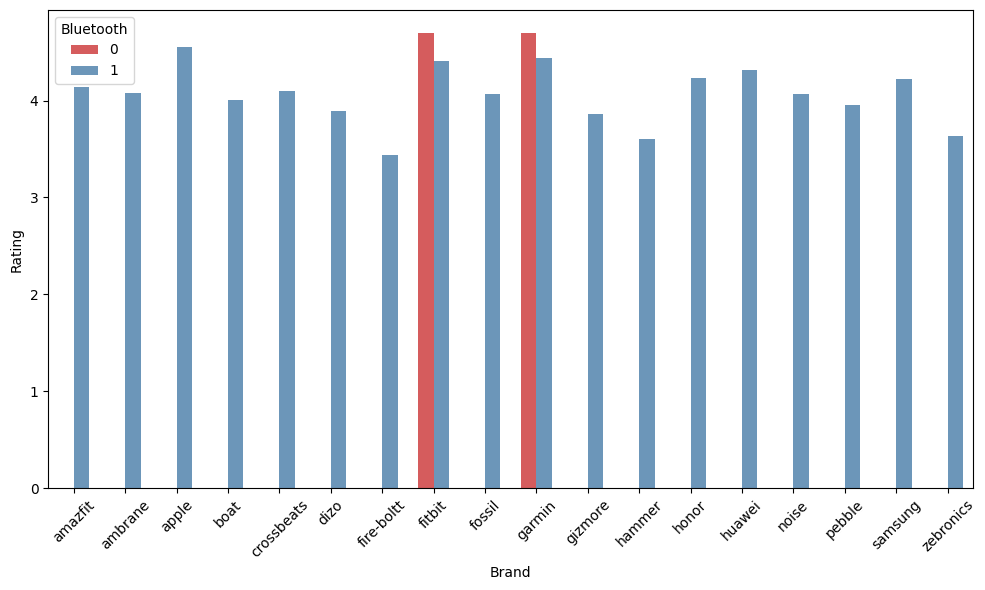

In [32]:
rating=data.groupby(["Brand","Bluetooth"])[["Rating"]].mean()

plt.figure(figsize=(10, 6))

sns.barplot(data=rating, x="Brand", y="Rating", hue="Bluetooth", 
                 palette="Set1", alpha=0.8, width=0.6)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

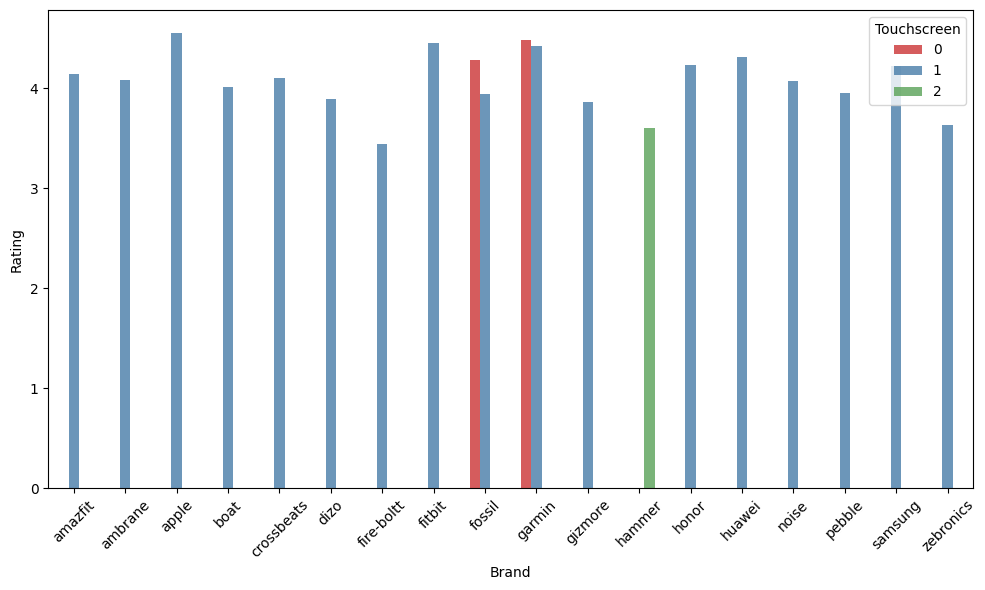

In [33]:
rating=data.groupby(["Brand","Touchscreen"])[["Rating"]].mean()

plt.figure(figsize=(10, 6))

sns.barplot(data=rating, x="Brand", y="Rating", hue="Touchscreen", 
                 palette="Set1", alpha=0.8, width=0.6)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [34]:
data[data["Current Price"]<data["Original Price"]]["Brand"].unique()

array(['noise', 'fire-boltt', 'boat', 'honor', 'crossbeats', 'samsung',
       'garmin', 'huawei', 'dizo', 'gizmore', 'ambrane', 'zebronics',
       'pebble', 'hammer', 'apple', 'fitbit', 'amazfit', 'fossil'],
      dtype=object)

In [35]:
pricey = []
for i in data["Brand"].unique():
    if i not in data[data["Current Price"]<data["Original Price"]]["Brand"].unique():
        pricey.append(i)
    else:
        pass
pricey

[]

In [36]:
brand_avg_price=data.groupby("Brand")[["Current Price", "Original Price"]].mean()

fig=px.bar(data_frame=brand_avg_price,barmode="group")
fig.update_layout(
    width = 1000, bargap=0.3
)

In [37]:
brand_avg_price[brand_avg_price["Current Price"]>brand_avg_price["Original Price"]]

,Current Price,Original Price
Brand,,
apple,43161.31,32092.31


<Axes: >

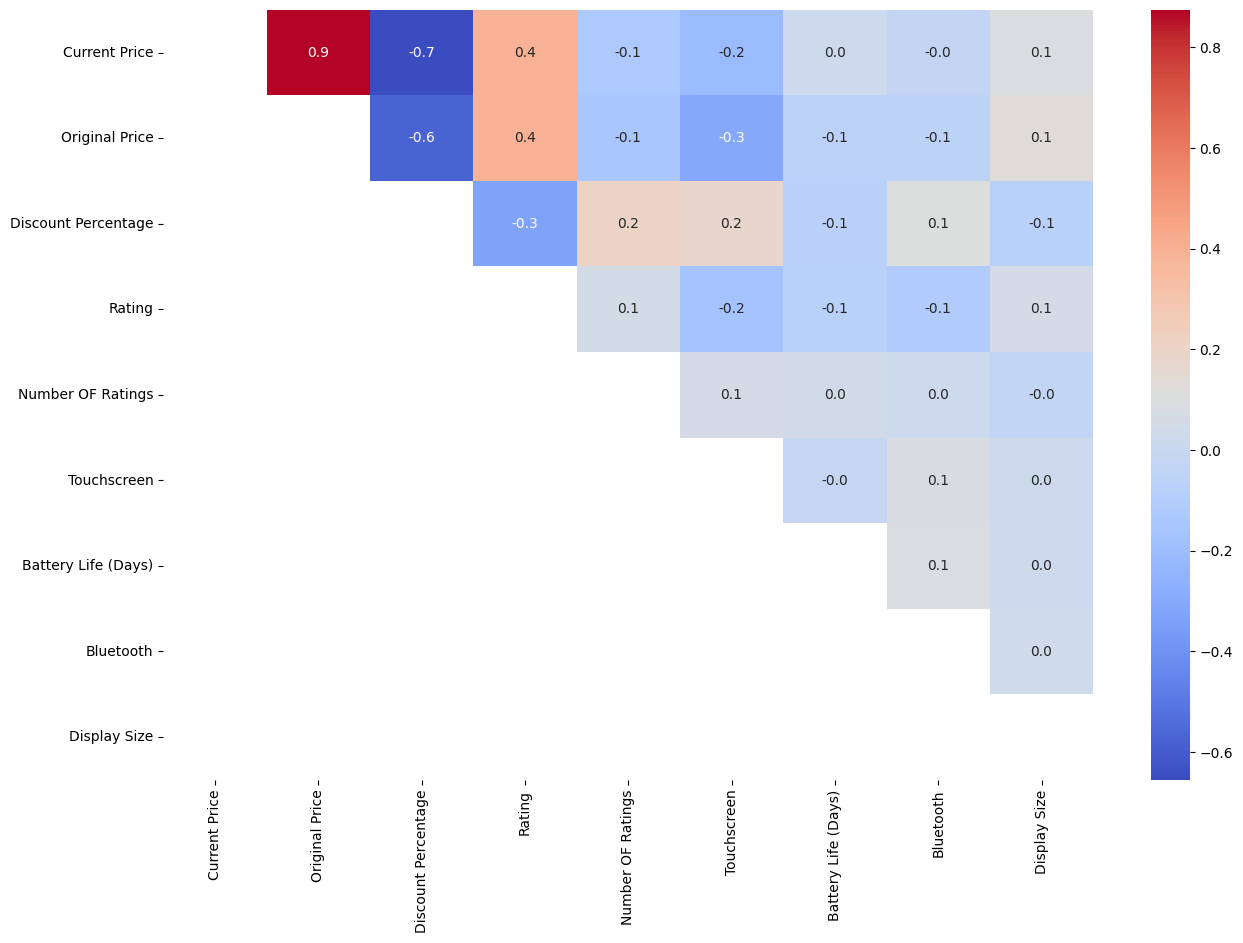

In [38]:
def mask_upper_triangle(matrix):
    mask = np.tri(matrix.shape[0], k=0, dtype=bool)
    matrix[mask] = np.nan
    return matrix

plt.figure(figsize=(15,10))

sns.heatmap(mask_upper_triangle(data.select_dtypes(include=np.number).corr()),annot=True,fmt=".1f",cmap='coolwarm')

There is obviously a positive correlaltion between current price and original price, as opposed to that of the former and its discount percentage.

What is noticeable from the chart is the negative association between the Original Price and the Discount Percentage. It can be deduced that the higher the orignal price of the product is, the less likely it is to be put on a significant discount and vice versa

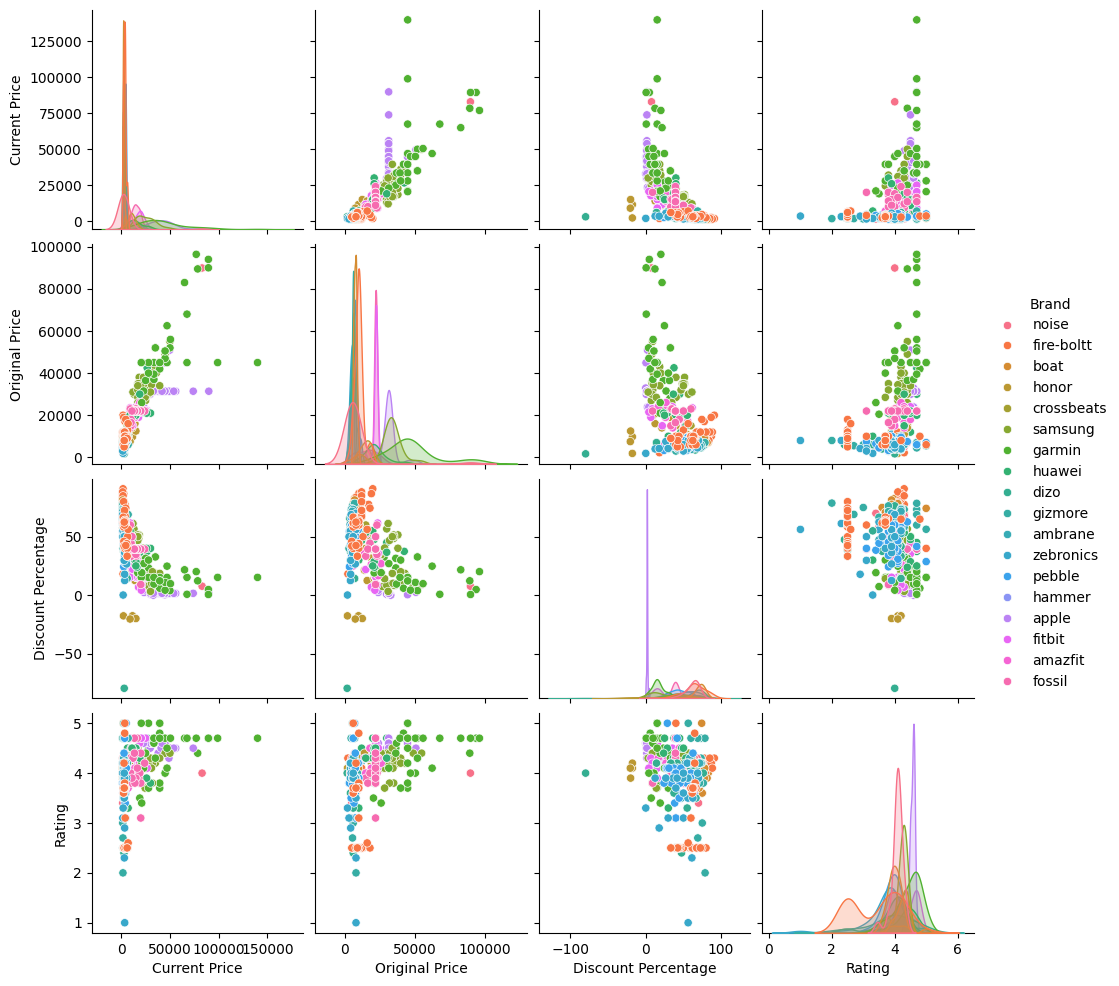

In [39]:
cols = ['Current Price','Original Price','Discount Percentage','Rating','Brand']

sns.pairplot(data[cols],hue='Brand')

In [40]:
weight=data.groupby("Weight")[["Current Price","Original Price"]].mean()

px.bar(data_frame=weight,barmode="group")

In [41]:
weight=data.groupby("Weight")["Rating"].mean().reset_index()

px.bar(data_frame=weight, x="Weight", y="Rating", color="Weight", 
             title="Average Rating by Weight", barmode="group")

<Axes: xlabel='Touchscreen', ylabel='Battery Life (Days)'>

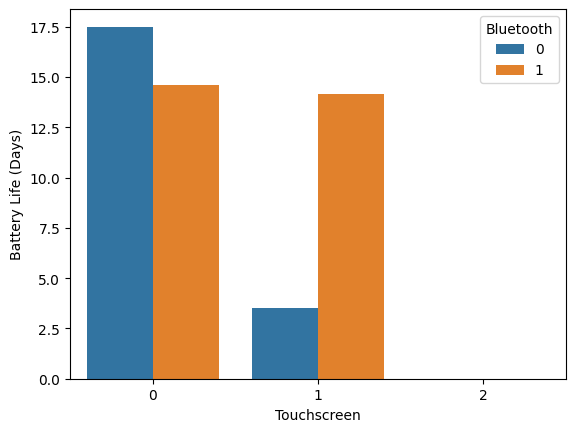

In [42]:
tb=data.groupby(["Touchscreen","Bluetooth"])[["Battery Life (Days)"]].mean()

sns.barplot(data=tb,x="Touchscreen",y="Battery Life (Days)",hue="Bluetooth")

Battery life of smartwatches without touchscreen is significantly higher than that with one for those having built-in bluetooth, with the difference being approximately half a month. In contrast, for those integrating bluetooth function, the battery life shows relatively similar numbers among both smartphone types with and without touchscreen

In [43]:
data.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.00,89900.00,7.69,4.00,65.00,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,Rectangle,Black,Other,1,8.00,1,1.70,35 - 50 g
1,fire-boltt,3799.00,16999.00,77.65,4.30,20788.00,BSW046,Square,Black,Silicon,1,3.50,1,1.80,50 - 75 g
2,boat,1999.00,7990.00,74.98,3.80,21724.00,Wave Call,Rectangle,Black,Silicon,1,8.00,1,1.70,35 - 50 g
3,fire-boltt,1799.00,19999.00,91.00,4.30,13244.00,BSW053,Square,Black,Silicon,1,3.50,1,1.80,75g +
4,noise,1599.00,4999.00,68.01,4.10,13901.00,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,Rectangle,Black,Other,1,8.00,1,1.70,35 - 50 g


In [44]:
data.columns

Index(['Brand', 'Current Price', 'Original Price', 'Discount Percentage',
       'Rating', 'Number OF Ratings', 'Model Name', 'Dial Shape',
       'Strap Color', 'Strap Material', 'Touchscreen', 'Battery Life (Days)',
       'Bluetooth', 'Display Size', 'Weight'],
      dtype='object')

In [45]:
tb=data.groupby(["Touchscreen","Bluetooth","Display Size"])[["Battery Life (Days)"]].mean()
tb

Battery Life (Days)
Touchscreen Bluetooth Display Size                     
0           0         0.80                        17.50
            1         0.80                        17.50
                      0.90                        15.92
                      1.00                        22.00
                      1.10                        11.17
                      1.20                        15.83
                      1.30                        15.08
                      1.70                        17.50
                      1.90                         8.00
                      18.50                        3.50
1           0         0.20                         3.50
                      1.30                         3.50
            1         0.00                        12.50
                      0.10                        14.76
                      0.20                        11.80
                      0.50                         8.00
                      0.60                        22.00
                      1.00                        15.83
                      1.10                        10.38
                      1.20                        12.27
                      1.30                        14.81
                      1.40                        11.32
                      1.50                        18.07
                      1.60                        17.08
                      1.70                        14.66
                      1.80                        14.55
                      1.90                        12.94
                      2.00                        15.00
                      2.10                        22.00
                      2.30                        22.00
                      2.40                         3.50
                      2.70                        22.00
                      3.00                         3.50
                      3.30                        13.88
                      3.50                        15.00
                      4.00                         3.50
                      4.20                        22.00
                      4.30                        15.83
                      4.40                         9.04
                      4.50                         8.00
                      4.60                         3.60
                      6.90                         3.50
                      15.90                       17.50
                      20.00                        3.50
                      27.90                       22.00
                      30.00                        8.00
                      33.00                       17.50
                      35.90                       22.00
                      45.00                       22.00
2           1         1.80                          NaN

In [46]:
px.histogram(data_frame=data, x="Battery Life (Days)",)

In [47]:
summary_stats = data.groupby(['Touchscreen', 'Bluetooth', 'Display Size'])['Battery Life (Days)'].agg(['mean', 'median', 'std']).reset_index().sort_values("Display Size",ascending=False)
summary_stats

,Touchscreen,Bluetooth,Display Size,mean,median,std
48,1,1,45.00,22.00,22.00,NaN
47,1,1,35.90,22.00,22.00,0.00
46,1,1,33.00,17.50,17.50,NaN
45,1,1,30.00,8.00,8.00,NaN
44,1,1,27.90,22.00,22.00,NaN
43,1,1,20.00,3.50,3.50,0.00
9,0,1,18.50,3.50,3.50,NaN
42,1,1,15.90,17.50,17.50,NaN
41,1,1,6.90,3.50,3.50,NaN
40,1,1,4.60,3.60,3.60,NaN


# Machine Learning Model

## Feature Engineering

In [48]:
data.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.00,89900.00,7.69,4.00,65.00,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,Rectangle,Black,Other,1,8.00,1,1.70,35 - 50 g
1,fire-boltt,3799.00,16999.00,77.65,4.30,20788.00,BSW046,Square,Black,Silicon,1,3.50,1,1.80,50 - 75 g
2,boat,1999.00,7990.00,74.98,3.80,21724.00,Wave Call,Rectangle,Black,Silicon,1,8.00,1,1.70,35 - 50 g
3,fire-boltt,1799.00,19999.00,91.00,4.30,13244.00,BSW053,Square,Black,Silicon,1,3.50,1,1.80,75g +
4,noise,1599.00,4999.00,68.01,4.10,13901.00,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,Rectangle,Black,Other,1,8.00,1,1.70,35 - 50 g


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [50]:
df1 = data.copy()

### Encode Non-Numeric Variables

In [51]:
le = LabelEncoder()

for i in df1.columns:
    if df1[i].dtype == 'object':
        df1[i] = le.fit_transform(df1[i])

In [52]:
df1

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,14,82990.00,89900.00,7.69,4.00,65.00,324,4,2,7,1,8.00,1,1.70,1
1,6,3799.00,16999.00,77.65,4.30,20788.00,17,5,2,11,1,3.50,1,1.80,2
2,3,1999.00,7990.00,74.98,3.80,21724.00,308,4,2,11,1,8.00,1,1.70,1
3,6,1799.00,19999.00,91.00,4.30,13244.00,19,5,2,11,1,3.50,1,1.80,3
4,14,1599.00,4999.00,68.01,4.10,13901.00,329,4,2,7,1,8.00,1,1.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,6,5999.00,8999.00,33.34,2.50,2571.00,363,0,11,11,1,22.00,1,1.30,3
436,6,3700.00,9999.00,63.00,3.70,2571.00,360,5,2,11,1,8.00,1,0.10,3
437,6,5999.00,8999.00,33.34,2.50,2571.00,363,0,8,11,1,22.00,1,1.30,3
438,6,3200.00,7999.00,59.99,3.70,2571.00,370,5,3,11,1,22.00,1,0.10,3


### Standardize Numeric Variables

In [53]:
data["Touchscreen"].mean()

0.9477272727272728

In [54]:
data["Touchscreen"].std()

0.23282814681980085

In [55]:
scaler = StandardScaler()

scaled_features_df1 = scaler.fit_transform(df1.drop("Battery Life (Days)",axis=1))
df1_feat = pd.DataFrame(scaled_features_df1,columns = df1.drop("Battery Life (Days)",axis=1).columns)
df1_feat.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Display Size,Weight
0,0.94,3.92,4.68,-1.41,-0.06,-0.26,1.15,0.49,-0.62,-0.92,0.22,0.10,-0.10,-0.51
1,-0.64,-0.52,0.01,1.38,0.48,0.28,-1.46,0.95,-0.62,0.42,0.22,0.10,-0.08,0.18
2,-1.22,-0.62,-0.57,1.27,-0.42,0.30,1.02,0.49,-0.62,0.42,0.22,0.10,-0.10,-0.51
3,-0.64,-0.63,0.20,1.91,0.48,0.08,-1.44,0.95,-0.62,0.42,0.22,0.10,-0.08,0.86
4,0.94,-0.64,-0.76,0.99,0.12,0.10,1.19,0.49,-0.62,-0.92,0.22,0.10,-0.10,-0.51


### Create train and test splits

In [56]:
x = df1_feat
y = df1["Battery Life (Days)"].fillna(df1["Battery Life (Days)"].median())

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [57]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor()
]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Ada Boost']

# Lists to store evaluation metrics
mse_scores = []
r2_scores = []

# Iterate over each model
for model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append scores to lists
    mse_scores.append(mse)
    r2_scores.append(r2)

# Create DataFrame for model comparison
model_comparison = pd.DataFrame({'Model': model_names, 'Mean Squared Error': mse_scores, 'R-squared': r2_scores})

# Sort DataFrame by R-squared score (higher is better)
model_comparison.sort_values(by='R-squared', ascending=False, inplace=True)

print(model_comparison)

               Model  Mean Squared Error  R-squared
2      Random Forest               39.29       0.31
4          Ada Boost               43.76       0.23
3  Gradient Boosting               44.55       0.22
0  Linear Regression               52.00       0.09
1      Decision Tree               86.14      -0.51


In [58]:
fig = px.scatter(model_comparison,x="Model",y=["Mean Squared Error","R-squared"],title="Model Comparison")
fig.show()

In [59]:
model = RandomForestRegressor(max_features='sqrt',n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f"MSE Score: {mean_squared_error(y_test,y_pred)}\n"
      f"R2 Score: {r2_score(y_test,y_pred)}")

feature_importance = pd.DataFrame({'Feature':x.columns,'Importance':model.feature_importances_})
feature_importance.sort_values(by="Importance",ascending=False,inplace=True)
feature_importance.reset_index(drop=True,inplace=True)
feature_importance

plt.figure(figsize=(10,6))
fig = px.line(x=feature_importance['Feature'],y=feature_importance['Importance'],markers='o',title='Feature Importance',
              template='plotly_dark',color_discrete_sequence=['pink'])
fig.update_layout(
    xaxis_title='Feature',
    yaxis_title = 'Importance',
    font={'family':'Arial','size':12}
)

fig.update_xaxes(tickangle=60
                 )
fig.show()


MSE Score: 36.116355297348484
R2 Score: 0.36727916448073517


<Figure size 1000x600 with 0 Axes>

In [60]:
type(y_pred)

numpy.ndarray

In [61]:
type(y_test)

pandas.core.series.Series

In [62]:
y_pred_comp = pd.DataFrame({"Battery Life (Pred)":y_pred,"Actual Values":y_test})

In [63]:
pd.set_option('display.max_rows', None)

In [64]:
y_pred_comp.sort_values(by="Actual Values",ascending=False,inplace=True)

In [65]:
y_pred_comp.reset_index(drop=True)

,Battery Life (Pred),Actual Values
0,12.52,22.00
1,14.70,22.00
2,14.73,22.00
3,20.43,22.00
4,16.69,22.00
5,16.84,22.00
6,21.26,22.00
7,19.84,22.00
8,10.62,22.00
9,13.26,22.00


In [66]:
data.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.00,89900.00,7.69,4.00,65.00,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,Rectangle,Black,Other,1,8.00,1,1.70,35 - 50 g
1,fire-boltt,3799.00,16999.00,77.65,4.30,20788.00,BSW046,Square,Black,Silicon,1,3.50,1,1.80,50 - 75 g
2,boat,1999.00,7990.00,74.98,3.80,21724.00,Wave Call,Rectangle,Black,Silicon,1,8.00,1,1.70,35 - 50 g
3,fire-boltt,1799.00,19999.00,91.00,4.30,13244.00,BSW053,Square,Black,Silicon,1,3.50,1,1.80,75g +
4,noise,1599.00,4999.00,68.01,4.10,13901.00,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,Rectangle,Black,Other,1,8.00,1,1.70,35 - 50 g


In [71]:
data.to_csv("smartwatches_preprocessed.csv",sep=",")